## UCI Income-census dataset exploration
***
Data Source: https://archive.ics.uci.edu/ml/datasets/adult
<br>
**Perform the following analysis and modeling routines**
1.  Load Data Properly
1.  Inspect and describe data
> - How many columns of what type? Numerical, categorical?
> - Basic statistics for numerical columns.
> - Unique values with counts for categorical columns.
1.  Handle Missing and unclean data
> - How many columns have missing entries.
> - How many rows with missing entries.
> - Handle missing entries: drop, impute etc.
1.  Handle Outliers
1.  Visualization
> - Age Distribution in different income levels, gender, .
> - Income level by industry stacked barplot.
> - Income level by years of education stacked barplot.
> - Income level by Occupation stacked barplot.
> - Income level by Marital Status stacked barplot.
> - Income level by Occupation stacked barplot.
> - Income level by Race stacked barplot.
1.  Correlation between numerical features.
1. Modeling: Logistic Regression Classifier
1. Evaluation of the model.

In [ ]:
## IMPORT ##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data and Basic Exploration

In [2]:
# Where to get the data from
url3 = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Column names from the description of data
col_names = ["age", "workclass", "fnlwgt", "education", 
              "educationnum", "maritalstatus", "occupation",
              "relationship", "race", "sex", "capitalgain",
              "capitalloss", "hoursperweek", "nativecountry",
              "incomelevel"]

In [3]:
#Load data in a dataframe
census = pd.read_csv(url3, names=col_names, skipinitialspace=True)

<div class="alert alert-block alert-info">
**skipinitialspace**: is applied because every object column values have leading balnk space.
</div>

In [4]:
census.head(2)

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,incomelevel
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
# Basic info
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        32561 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       32561 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    32561 non-null object
incomelevel      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Categorical and Numerical columns

In [6]:
#inspect the data types of each column
census.dtypes==object

age              False
workclass         True
fnlwgt           False
education         True
educationnum     False
maritalstatus     True
occupation        True
relationship      True
race              True
sex               True
capitalgain      False
capitalloss      False
hoursperweek     False
nativecountry     True
incomelevel       True
dtype: bool

In [7]:
# All Categorical columns
cat_cols = census.columns[census.dtypes==object]

In [8]:
# All numerical Columns
census.columns[census.dtypes==int]

Index([u'age', u'fnlwgt', u'educationnum', u'capitalgain', u'capitalloss',
       u'hoursperweek'],
      dtype='object')

#### QUESTIONS
***
- Find a subset of the dataframe with only numerical columns (census_num)
- Find a subset of the dataframe with only object type columns (census_cat)

***
Understand the difference between view and copy

In [9]:
# Only numerical columns
census_num = census[census.columns[census.dtypes!=object]]
census_num.head(2)


,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13


In [10]:
# Only categorical columns
census_cat = census[census.columns[census.dtypes ==object]]
census_cat.head(2)

,workclass,education,maritalstatus,occupation,relationship,race,sex,nativecountry,incomelevel
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K


In [11]:
# NOTE: were we not using skipinitialspace=True, 
# we woul have the following output
#census.workclass.unique()

In [12]:
census.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

<div class="alert alert-block alert-info">
Notice that the '?' mark signify missing entries, that are not reported by df.info().
</div>

In [13]:
census.education.unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [14]:
census.maritalstatus.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed'], dtype=object)

In [15]:
census.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [16]:
census.relationship.unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [17]:
census.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [18]:
census.nativecountry.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala', 'China',
       'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)',
       'Scotland', 'Trinadad&Tobago', 'Greece', 'Nicaragua', 'Vietnam',
       'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands'], dtype=object)

In [19]:
census.sex.unique()

array(['Male', 'Female'], dtype=object)

In [20]:
census.incomelevel.unique()

array(['<=50K', '>50K'], dtype=object)

### Handle Missing Data
***
#### Replace missing entry signifier (eg. ?) by np.nan

In [21]:
census.replace('?',np.nan, inplace=True)

In [22]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age              32561 non-null int64
workclass        30725 non-null object
fnlwgt           32561 non-null int64
education        32561 non-null object
educationnum     32561 non-null int64
maritalstatus    32561 non-null object
occupation       30718 non-null object
relationship     32561 non-null object
race             32561 non-null object
sex              32561 non-null object
capitalgain      32561 non-null int64
capitalloss      32561 non-null int64
hoursperweek     32561 non-null int64
nativecountry    31978 non-null object
incomelevel      32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [24]:
# Find number of rows with missing entries. Inspect some of them.
census[census.isnull().any(axis=1)].shape

(2399, 15)

In [136]:
#Drop the rows having missing entries
census_nona = census.dropna(axis=0)

In [26]:
census_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
age              30162 non-null int64
workclass        30162 non-null object
fnlwgt           30162 non-null int64
education        30162 non-null object
educationnum     30162 non-null int64
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
sex              30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
incomelevel      30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Numerical and and categorical columns after removing the missing
census_num = census_nona[census_nona.columns[census_nona.dtypes!=object]]
census_cat = census_nona[census_nona.columns[census_nona.dtypes==object]]

### Visualization
***
#### Explore the distribution of some numerical columns with income level

incomelevel
<=50K    Axes(0.125,0.125;0.775x0.755)
>50K     Axes(0.125,0.125;0.775x0.755)
Name: age, dtype: object

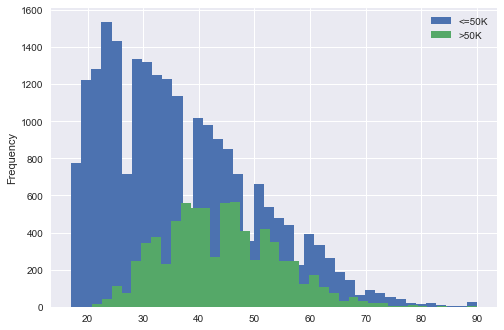

In [97]:
# Distribution of age in the two income levels
census_nona.groupby("incomelevel").age.plot(kind='hist', legend=True, bins=40)

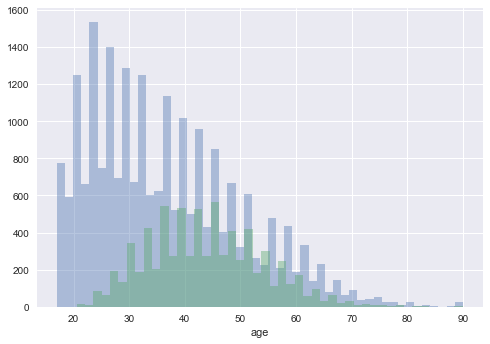

In [98]:
# Distribution of age in the two income levels
sns.distplot(census_nona0.age, kde=False)
sns.distplot(census_nona1.age, kde=False)

In [37]:
# Doing the following is not a good idea
census_nona.replace('<=50K', 0, inplace=True)
census_nona.replace('>50K', 1, inplace=True)

/Users/upendraprasad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/upendraprasad/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<div class="alert alert-block alert-danger">
Be careful when changing a dataframe which is a subset of another. You can have unintended consequences.
</div>

#### Correlation between numerical columns

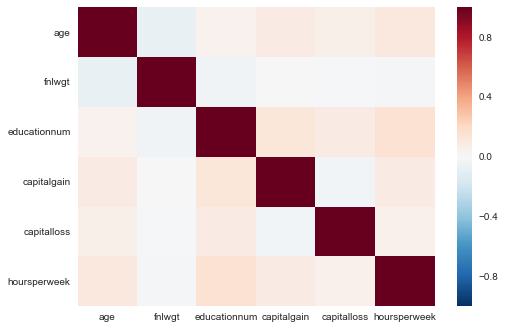

In [99]:

import seaborn as sns
sns.heatmap(data=census_num.corr(), vmax=1.0)

#### Bar-plots of Categorical columns

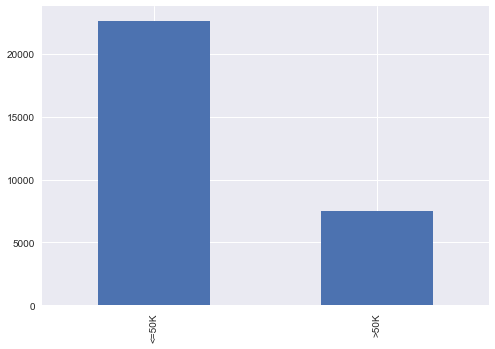

In [120]:
# Income level distribution
census_nona.incomelevel.value_counts().plot.bar()

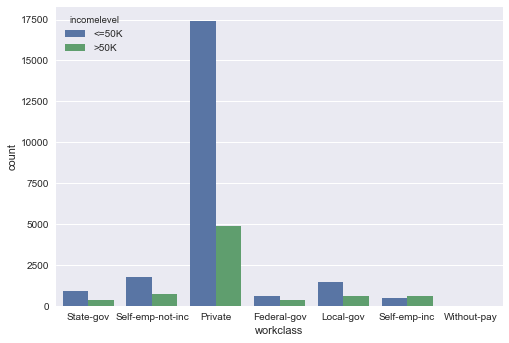

In [40]:
# Grouped Bar-Plot
g = sns.countplot(x="workclass", hue="incomelevel", 
                data=census_nona)

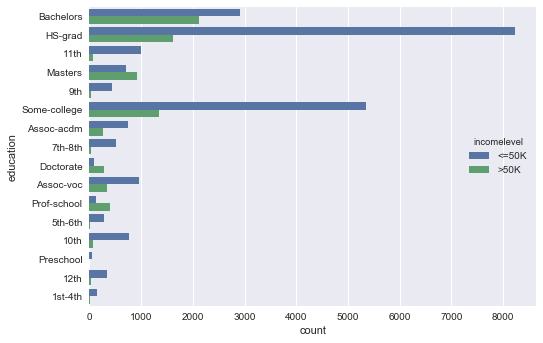

In [48]:
# You can choose x or y for your data
g = sns.countplot(y="education", hue="incomelevel", 
                data=census_nona)

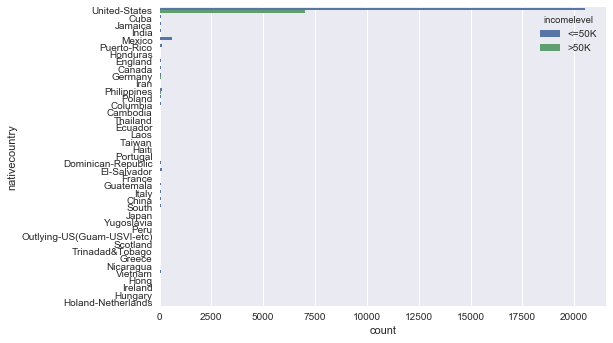

In [53]:
g = sns.countplot(y="nativecountry", hue="incomelevel", 
                data=census_nona)

In [124]:
# Above plot is not very informative. So just take a look at the value counts
census_nona.nativecountry.value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

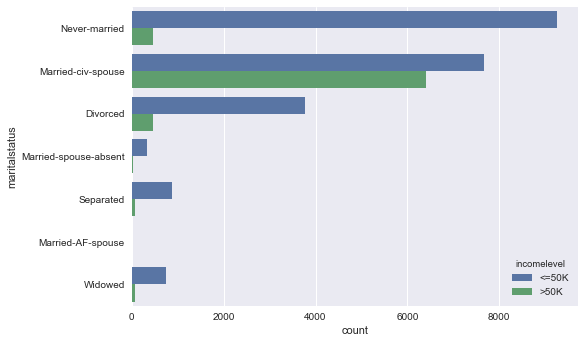

In [56]:
g = sns.countplot(y="maritalstatus", hue="incomelevel", 
                data=census_nona)

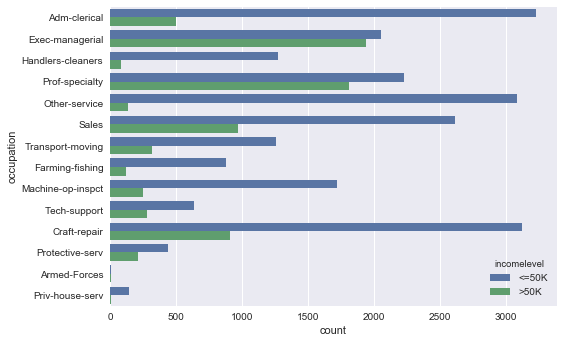

In [47]:
g = sns.countplot(y="occupation", hue="incomelevel", 
                data=census_nona)

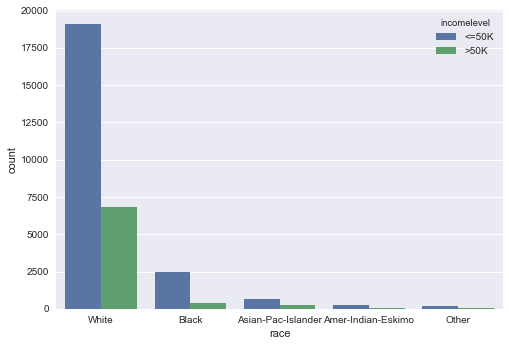

In [44]:
g = sns.countplot(x="race", hue="incomelevel", 
                data=census_nona)

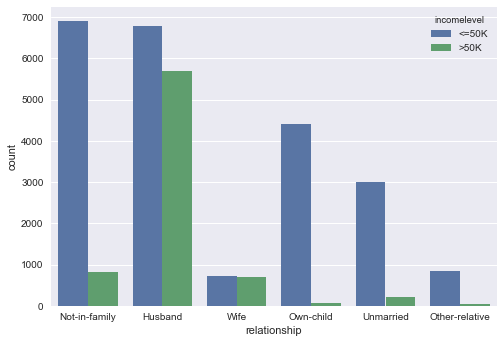

In [45]:
g = sns.countplot(x="relationship", hue="incomelevel", 
                data=census_nona)

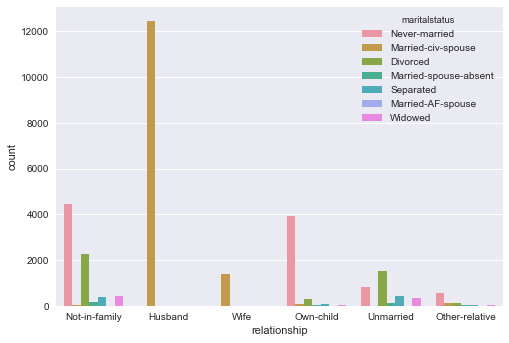

In [115]:
g = sns.countplot(x="relationship", hue="maritalstatus", 
                data=census_nona)

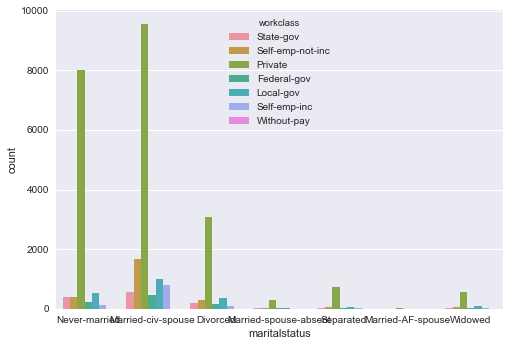

In [118]:
g = sns.countplot(x="maritalstatus", hue="workclass", 
                data=census_nona, orient='v')

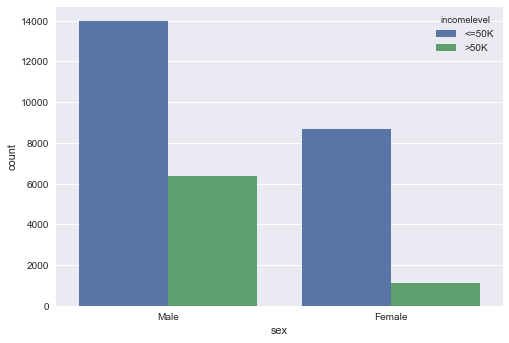

In [46]:
# What inference can you draw from the followin?
g = sns.countplot(x="sex", hue="incomelevel", 
                data=census_nona)

In [41]:
census_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 9 columns):
workclass        30162 non-null object
education        30162 non-null object
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
sex              30162 non-null object
nativecountry    30162 non-null object
incomelevel      30162 non-null object
dtypes: object(9)
memory usage: 3.6+ MB


#### Stacked bar plot for different income levels

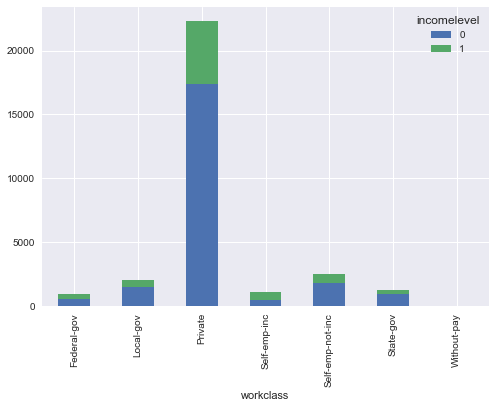

In [55]:
census_nona.groupby(by=['incomelevel', 'workclass']).age.agg("count").unstack().T.plot.bar(stacked=True)

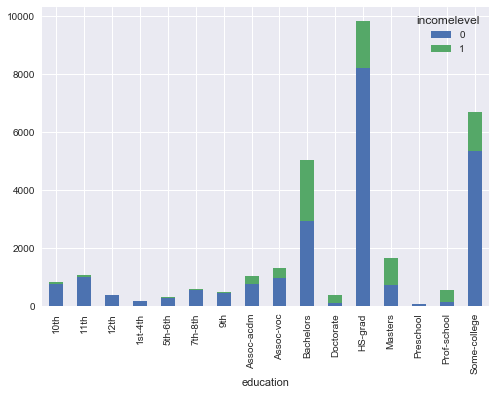

In [60]:
census_nona.groupby(by=['incomelevel', 'education']).age.agg("count").unstack().T.plot.bar(stacked=True)

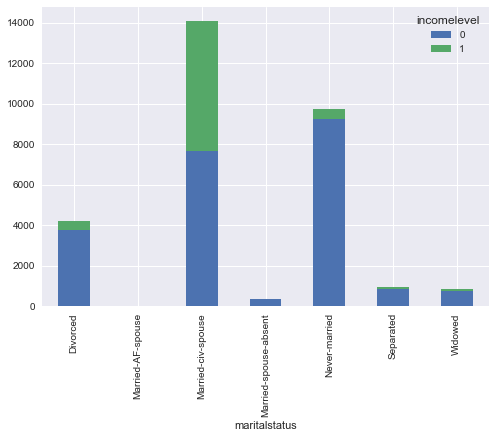

In [62]:
census_nona.groupby(by=['incomelevel', 'maritalstatus']).age.agg("count").unstack().T.plot.bar(stacked=True)

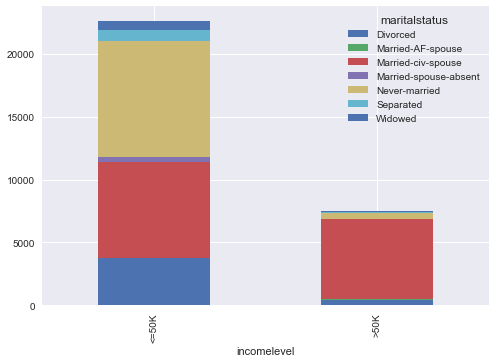

In [104]:
# Here is another approach
census_nona.groupby(by=['incomelevel']).maritalstatus.value_counts().unstack().plot(kind='bar', stacked=True)

In [114]:
# HOW does the stacked plot  work
cngb = census_nona.groupby(by=['incomelevel']).maritalstatus.value_counts()
cngb.unstack()

maritalstatus,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
incomelevel,,,,,,,
<=50K,3762,11,7666,339,9256,873,747
>50K,452,10,6399,31,470,66,80


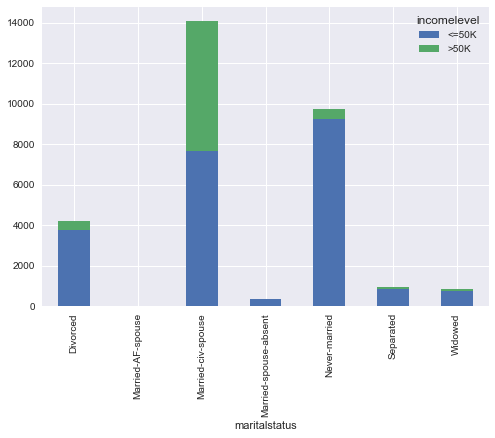

In [108]:
cngb = census_nona.groupby(by=['incomelevel'])
cngb.maritalstatus.value_counts().unstack().T.plot(kind='bar', stacked=True)

<div class="alert alert-block alert-info">
Note the following factorplots are different from the bar-plots we have seen above. The two income levels are not proportionately represented.
</div>

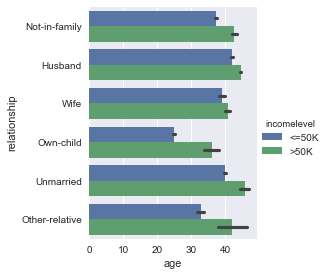

In [51]:
sns.factorplot(x="age", y="relationship", hue="incomelevel", 
               data=census_nona, kind="bar")

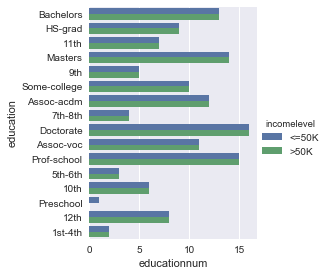

In [52]:
sns.factorplot(x="educationnum", y="education", hue="incomelevel", 
               data=census_nona, kind="bar")

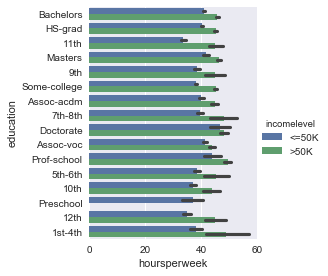

In [59]:
sns.factorplot(y="education", x="hoursperweek", hue="incomelevel", 
               data=census_nona, kind="bar")

In [65]:
# Statistical Description of Numerical data
census_num.describe()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


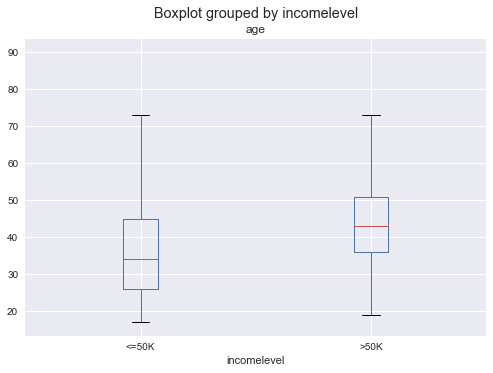

In [72]:
# Boxplot of numerical variables grouped by Income level
census_nona.boxplot(column='age', by= 'incomelevel' )

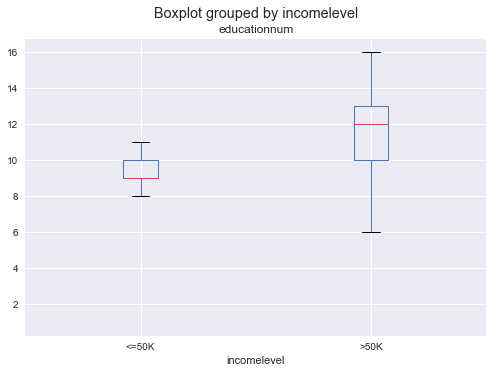

In [73]:
# Boxplot of numerical variables grouped by Income level
census_nona.boxplot(column='educationnum', by= 'incomelevel' )

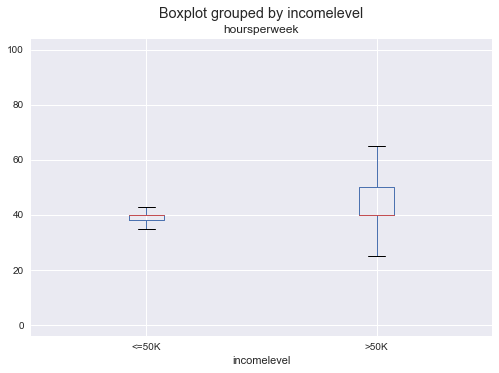

In [74]:
# Boxplot of numerical variables grouped by Income level
census_nona.boxplot(column='hoursperweek', by= 'incomelevel' )

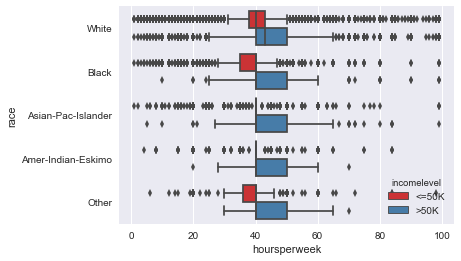

In [130]:
sns.boxplot(data = census_nona, y = 'race', x = 'hoursperweek', hue='incomelevel', palette='Set1')

### Modeling the data

In [150]:
# import scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

#### Preparing the data
***
Need to get feature matrix, X,  and target variable, y, from the data.

In [138]:

# Save the income level column after replacing the string by numbers
census_nona_cp = census_nona.copy()
y = census_nona_cp.incomelevel.replace({"<=50K":0, ">50K":1})

#Drop the incomelevel column
census_nona_cp.drop('incomelevel', axis=1, inplace=True)

# All Categorical columns
cat_cols = census_nona_cp.columns[census_nona_cp.dtypes==object]

# Get dummy variables for all categorical columns and save to a new DF
census2 = pd.get_dummies(census_nona_cp, columns=cat_cols)

# Delete the copy
del(census_nona_cp)

In [139]:
census2.head()

,age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,nativecountry_Portugal,nativecountry_Puerto-Rico,nativecountry_Scotland,nativecountry_South,nativecountry_Taiwan,nativecountry_Thailand,nativecountry_Trinadad&Tobago,nativecountry_United-States,nativecountry_Vietnam,nativecountry_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
X = census2.values
X.shape

(30162, 104)

In [142]:
# Split Data for train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [144]:
# Scale the data
scaler = StandardScaler()
Xn_train = scaler.fit_transform(1.0*X_train)
Xn_test = scaler.transform(1.0* X_test)

#### Logistic Regression on the census data

In [ ]:
# Create an object of the Logistic Regression class
lrm = LogisticRegression()

In [145]:
#Train
lrm.fit(Xn_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [146]:
lrm.predict(Xn_test[0:5])

array([0, 0, 1, 0, 0])

In [147]:
# EVALUATION: Accuracy
print("Test Accuracy: ",100* lrm.score(Xn_test, y_test))

('Test Accuracy: ', 84.948613106420595)


In [148]:
# ACCURACY: Precision, Recall and F_1 score. Google them.
from sklearn.metrics import classification_report
print classification_report(y_test, lrm.predict(Xn_test))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6813
          1       0.73      0.62      0.67      2236

avg / total       0.84      0.85      0.84      9049



#### Support Vector Machine

In [158]:
svc = SVC(C=2.0)
svc.fit(Xn_train, y_train)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [159]:
# EVALUATION: Accuracy
print("Test Accuracy: ",100* svc.score(Xn_test, y_test))

('Test Accuracy: ', 84.617084760747048)


In [160]:
# ACCURACY: Precision, Recall and F_1 score. Google them.
from sklearn.metrics import classification_report
print classification_report(y_test, svc.predict(Xn_test))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90      6813
          1       0.74      0.59      0.65      2236

avg / total       0.84      0.85      0.84      9049

